In [10]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [12]:
# Kmeans on Crime Data set 
crd = pd.read_csv("crime_data.csv")
crd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [13]:
# Normalized data frame (considering the numerical part of data)
X=crd.iloc[:,1:]
df_norm = norm_func(X)
df_norm.head(10)  

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [14]:
#Creating the model

In [15]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [16]:
crd['Clust']=model.labels_ # creating a  new column and assigning it to new column 
crd.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [17]:
crd.iloc[:,1:5].groupby(crd.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.016667,143.888889,72.333333,19.344444
2,3.600000,78.538462,52.076923,12.176923


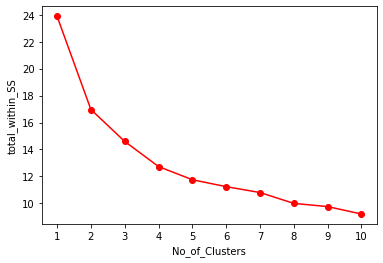

In [18]:
###### scree plot or elbow curve ############
k = list(range(1,11))
# variable for storing total within sum of squares for each kmeans 
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    # variable for storing within sum of squares for each cluster 
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

In [22]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [26]:
ml=pd.Series(model.labels_)  # converting numpy array into pandas series object

In [29]:
crd['Clust']=ml # creating a  new column and assigning it to new column 
crd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [30]:
crd.iloc[:,1:5].groupby(crd.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,5.656250,138.875000,73.875000,18.781250


In [ ]:
# creating a csv file 
crd.to_csv("crimedataclust.csv")